<a href="https://colab.research.google.com/github/Alenushka2013/ML_for_people_tasks/blob/main/HW_2_1_Linear_regression_on_multiple_variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні ми з вами побудуємо повноцінне ML-рішення реальної ML-задачі. Ви вже маєте всі знання, які для цього потрібні. Дотримуйтесь інструкцій, та користуйтесь матеріалами лекцій, аби виконувати завдання. Тут інструкції будуть детальні, а в подільших завданнях - будуть ставати все менш детальними, аби ви вже починали самостійно структурувати ML-проєкт і до кінця курсу для вас розвʼязати будь-яку ML–задачу було eazy-breezy.

## Dataset

Будемо працювати з набором даних `cars.csv`, який описує автомобілі і їх ціну у індійських рупіях :) Мета - передбачити ціну авто за його характеристиками. Опис набору даних:

| Назва рядка            | Опис                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Унікальний ідентифікатор для кожного оголошення про автомобіль.                                                                                         |
| Brand                  | Бренд або виробник автомобіля (наприклад, Toyota, Honda, Ford тощо).                                                                                     |
| Model                  | Модель автомобіля (наприклад, Camry, Civic, Mustang тощо).                                                                                               |
| Year                   | Рік виготовлення автомобіля.                                                                                                                            |
| Kilometers_Driven      | Загальний пробіг автомобіля у кілометрах.                                                                                                               |
| Fuel_Type              | Тип палива, який використовує автомобіль (наприклад, бензин, дизель, електро тощо).                                                                      |
| Transmission           | Тип трансмісії автомобіля (наприклад, механічна, автоматична).                                                                                           |
| Owner_Type             | Кількість попередніх власників автомобіля (наприклад, перший, другий, третій).                                                                           |
| Mileage                | Паливна ефективність автомобіля у кілометрах на літр.                                                                                                   |
| Engine                 | Об'єм двигуна автомобіля в кубічних сантиметрах (CC).                                                                                                   |
| Power                  | Максимальна потужність автомобіля в кінських силах (bhp).                                                                                               |
| Seats                  | Кількість місць в автомобілі.                                                                                                                           |
| Price                  | Вартість автомобіля в INR (індійські рупії), що є цільовою змінною для прогнозування.                                                                   |

# Імпорти

Для зручності рекомендую всі імпорти розмістити тут нагорі, аби коли ви перезавантажували ноутбук, одразу можна було в один запуск клітинки імпортувати всі потрібні бібліотеки.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

pd.set_option('display.max_columns', 100)

# Знайомство з даними

**Завдання 1.** Завантажте набір даних `cars.csv` в pandas.DataFrame. Виведіть перші 5 записів.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Alenushka2013/Coursera/refs/heads/master/Datasets/cars.csv')
df.head(5)

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


**Завдання 2.** Виведіть типи даних колонок даних, а також дослідіть, які по факту типи даних мають записи в кожній колонці (тип `object` може містити різні типи даних) і скільки значень є в кожній категоріальній колонці.

Напишіть висновок, скільки в наборі даних числових та категоріальних колонок кожного з трьох різних типів (бінарна, мільтикатегоріальна без порядку, мультикатегоріальна з порядком). Шаблон висновку

```
В наборі даних 10 числових і 10 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 6 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 2 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large)
```

Якщо не знаєте, як це зробити з `pandas` - ось підказка, які методи можуть допомогти вам виконати це завдання

- pandas.DataFrame.info()
- pandas.DataFrame.dtypes
- pandas.DataFrame.loc[...]
- pandas.DataFrame.select_dtypes(...)
- pandas.Series.unique()
- pandas.Series.nunique()

Детальніше ознайомитись з кожним ви можете в [документації](https://pandas.pydata.org/docs/reference/frame.html), або написати в окремій клітинці знак питання і назву методу (тільки приберіть це перед здачею, бо перегляд документації - не допомагає зрозуміти дані і хід думок, а Ваша робота - це як презентація замовнику зробленої задачі).


In [3]:
print('Іформація про всі колонки:')
df.info()

Іформація про всі колонки:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


In [4]:
def df_report(df):
  report = {'numerical columns': df.columns[df.dtypes == "int"].to_list(),
            'number of numeric columns': sum(df.dtypes == "int"),
            'categorical columns': df.columns[df.dtypes == "object"].to_list(),
            'number of categorical columns': sum(df.dtypes == "object"),
            'categorical binar columns': [],
            'categoracal multicategor columns': [],
            #'categorical order columns':[]
            }

  df_columns_report = {'column name': [],
                      'column type': [],
                      'number of unique values': [],
                      'values or range of values (min, max)':[]
                      }

  for column in df.columns:
    df_columns_report['column name'].append(column)
    df_columns_report['column type'].append(df[column].dtypes)
    df_columns_report['number of unique values'].append(df[column].nunique())
    if df[column].dtypes == 'object':
      column_values = df[column].unique()
      df_columns_report['values or range of values (min, max)'].append(column_values)
      if len(column_values) == 2:
        report['categorical binar columns'].append(column)
      else:
        report['categoracal multicategor columns'].append(column)
    else:
      df_columns_report['values or range of values (min, max)'].append((df[column].min(), df[column].max()))

  from tabulate import tabulate

  print(tabulate(report.items(), headers=['Сriterion name', 'Value'], tablefmt='grid'), end = '\n\n')


  df_report_result = pd.DataFrame(df_columns_report)
  return df_report_result

In [5]:
df_report(df)

+----------------------------------+-----------------------------------------------------------------------------------------+
| Сriterion name                   | Value                                                                                   |
+==================================+=========================================================================================+
| numerical columns                | ['Car_ID', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price'] |
+----------------------------------+-----------------------------------------------------------------------------------------+
| number of numeric columns        | 8                                                                                       |
+----------------------------------+-----------------------------------------------------------------------------------------+
| categorical columns              | ['Brand', 'Model', 'Fuel_Type', 'Transmission', 'Owner_Type']             

,column name,column type,number of unique values,"values or range of values (min, max)"
0,Car_ID,int64,100,"(1, 100)"
1,Brand,object,11,"[Toyota, Honda, Ford, Maruti, Hyundai, Tata, M..."
2,Model,object,58,"[Corolla, Civic, Mustang, Swift, Sonata, Nexon..."
3,Year,int64,6,"(2016, 2021)"
4,Kilometers_Driven,int64,18,"(10000, 60000)"
5,Fuel_Type,object,2,"[Petrol, Diesel]"
6,Transmission,object,2,"[Manual, Automatic]"
7,Owner_Type,object,3,"[First, Second, Third]"
8,Mileage,int64,15,"(10, 25)"
9,Engine,int64,36,"(999, 4951)"


**Висновок:**
В наборі даних 8 числових та 5 категоріальних колонок, з них:
- 2 бінарні (мають лише 2 значення): Fuel_Type та Transmission
- 2 мультикатегоріальні (більше 2х значень) зі значеннями, для яких немає відношення порядку: Brand і Model
- 1 колонка, в якій можна встановити відношення порядку:  Owner_Type зі значеннями: [First, Second, Third]

**Завдання 3**. Розділіть дані на тренувальні і тест. Відведіть в тест 20%, поставте `random_state=12`. Ми будемо передбачати колонку `Price` - тож, вона є цільовою змінною. В результаті у Вас має бути 4 набори даних `X_train, X_test, y_train, y_test`.

Надалі ми всюди тренуємо методи для кодування, масштабування та саму модель тільки на тренувальних даних X_train (та y_train для моделі), а на тестувальних лише використовуємо вже навчені методи для кодування, масштабування і модель викликаючи в них `transform()` (для методів обробки даних) або `predict()` (для моделі).

І так само треба робити завжди.

In [6]:
from sklearn.model_selection import train_test_split
X = df.drop(['Price', 'Car_ID'], axis = 1)
y = df.Price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

**Завдання 4**. Кодуємо категоріальні колонки.

1. Закодуйте колонки з бінарними значеннями `Fuel_Type` і `Transmission` так, аби вони були у чисельному представленні і містили лише 0 так 1. Приклад був у лекції. Значення 1 нехай буде у категорії, яка містить більше значень в колонці.

2. Закодуйте колонку `Brand` з використанням `sklearn.preprocessing.OneHotEncoder` аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу `Encoder.fit()` на тренувальних даних `X_train`, а на тестувальних тільки викликаємо `Encoder.transform()`. Додайте закодовані значення в набори даних `X_train`, `X_test`.

3. Колонку `Owner_Type` з використанням `sklearn.preprocessing.OrdinalEncoder` я закодую для вас. Проаналізуйте, що відбувається.

Колонка `Model` містять забагато значень для кодування в тому вигляді, як вона є зараз, з огляду на невелику кількість даних. Якщо ви бачите, як можна згрупувати значення в цій колонці скоротивши кількість унікальних значень до 3-5, то можете виконати ще цю трансформацію, використати цю колонку в моделі і отримати додаткову практику і бал, якщо все буде зроблено правильно. А якщо неправильно - то фідбек на Вашу роботу :)

In [7]:
# Кодування Fuel_Type
most_common_fuel = X_train['Fuel_Type'].value_counts().idxmax()
col_name = 'Fuel_Type' + '_' + most_common_fuel
X_train[col_name] = (X_train['Fuel_Type'] == most_common_fuel).astype(int)
X_test[col_name] = (X_test['Fuel_Type'] == most_common_fuel).astype(int)

# Кодування Transmission
most_common_trans = X_train['Transmission'].value_counts().idxmax()
col_name = 'Transmission' + '_' + most_common_trans
X_train[col_name] = (X_train['Transmission'] == most_common_trans).astype(int)
X_test[col_name] = (X_test['Transmission'] == most_common_trans).astype(int)

In [8]:
# Кодування Brand
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder() # Створення екземпляру кодувальника — об'єкт enc, який буде знати, як кодувати категорії
enc.fit(X_train[['Brand']]) # "Навчання" кодувальника на колонці 'Brand' з тренувального набору. Тепер enc знає всі  категорії, в якому вони порядку, і як їх кодувати.
X_train[enc.categories_[0]] = enc.transform(X_train[['Brand']]).toarray()
X_test[enc.categories_[0]] = enc.transform(X_test[['Brand']]).toarray()

In [9]:
from sklearn.preprocessing import OrdinalEncoder

ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']]) # визначаємо порядок категорій
ordenc.fit(X_train[['Owner_Type']])

X_train['Owner_Type_Codes'] = ordenc.transform(X_train[['Owner_Type']])
X_test['Owner_Type_Codes'] = ordenc.transform(X_test[['Owner_Type']])

Очікуваний результат після трансформацій:

In [10]:
display(X_train.head()), display(X_test.head())

,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Petrol,Transmission_Automatic,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
83,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
55,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
19,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Petrol,Transmission_Automatic,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
17,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
92,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
68,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


(None, None)

In [11]:
brand_model_summary = df.groupby('Brand').agg(unique_models=('Model', lambda x: x.unique()),
                                          num_unique_models=('Model', 'nunique'))
brand_model_summary.columns = ['Моделі', 'Кількість моделей']
brand_model_summary

,Моделі,Кількість моделей
Brand,,
Audi,"[A4, Q3, A6, A3, Q7, A5]",6
BMW,"[X1, 5 Series, X3, 7 Series, X5, 3 Series]",6
Ford,"[Mustang, Endeavour, Figo, Aspire, Ranger, Eco...",6
Honda,"[Civic, City, WR-V, BR-V]",4
Hyundai,"[Sonata, Creta, Verna, Elantra, Santro, Venue]",6
Mahindra,"[Scorpio, Thar, XUV300]",3
Maruti,"[Swift, Ertiga, Vitara, S-Cross]",4
Mercedes,"[C-Class, GLC, E-Class, GLE, GLA]",5
Tata,"[Nexon, Harrier, Altroz, Safari, Tigor, Tiago]",6


***Кодування колонки Model***

Колонка містить 58 унікальних значень і додавати більше 50 стовбчиків за допомогою OneHotEncoder  недоцільно. Можна використати двійкове кодування: значення від 1 до 58 записуються двійковими числами, 58 в двійковій системі 111010 має шість розрядів, для кодування таких значень достатньо шести нових колонок.

В даних модель автомобіля пов'язана з назвою бренду. І для кожного з брендів представлено максимум шість моделей. Тому можна скористатися двійковим кодуванням для кожного бренду окремо. В такому випадку максимальне значення 6 буде закодоване як 110 і потребує всього три нові стовбчики для представлення таких даних.

Існують інші способи кодування подібних категоріальних даних, та враховуючи частоту значень у вибірці, саме цей спосіб гарантує збереження початкової інформації з мінімальним перетворенням.

*Мінуси*:

- невелика кількість даних порівняно з різноманітністю моделей, в тестовому наборі точно будуть моделі, яких немає в навчальному, отже всі ці значення закодуються однаково - нулями. При цьому можуть бути абсолютно різні автомобілі, з значною різницею в характеристиках і ціні.
- деякий штучний порядок між категоріми може створюватися 001, 010, 011 і т.д.
- складність інтерпретації.
- пов'язаність моделі і бренду створює однакові значення моделей для різних брендів, та дає можливість зменшити кількість колонок. При цьому потрібно пам'ятати, що  і розглядати результати аналізу потрібно буде комплексно для значень Бренд-Модель.

Спробую закодувати колонку двома способами:
1. Всі значення категорії кодуються до розподілу на навчальну і тестову вибірку. Так робити не варто, та в даному випадку, це можливість однозначно закодувати всі моделі і подивитися як спрацює модель лінійної регресії.
2. Закодувати окремо навчальну і тестову вибірки, і прийняти той факт, що деякі моделі будуть мати однакове нульове значення. Як цьому запобігти для невеликої вибірки даних я ще не придумала.

Всі дослідження з цими даними будуть описані окремо після 10 завдання, щоб спростити перевірку домашнього завдання і перевірити як спрацює модель з такими значеннями.

Створення окремих навчальних і тестових вибірок для кожного способу:

In [12]:
X_train_bin1, X_test_bin1 = X_train.copy(), X_test.copy()
X_train_bin2, X_test_bin2 = X_train.copy(), X_test.copy()

In [13]:
# Створення словника з двійковими кодами для моделей різних брендів
model_encoding_dict = {}

# Визначення максимальної кількості стовбців для кодування
max_bits = int(np.ceil(np.log2(df.groupby('Brand').Model.nunique().max())))
bit_cols = [f'Model_bin_{i}' for i in range(max_bits)] # Назви колонок

# Заповнення словника кодами моделей
for brand in df['Brand'].unique():
    models = sorted(df[df['Brand'] == brand]['Model'].unique())
    model_codes = {}

    for i, model in enumerate(models, start = 1):
        binary = list(map(int, list(np.binary_repr(i, width=max_bits))))
        model_codes[model] = binary

    model_encoding_dict[brand] = model_codes

In [14]:
df_coder = pd.DataFrame(model_encoding_dict)
df_coder.shape # Перевірка чи всі моделі закодовано

(58, 11)

In [15]:
df_coder

,Toyota,Honda,Ford,Maruti,Hyundai,Tata,Mahindra,Volkswagen,Audi,BMW,Mercedes
Camry,"[0, 0, 1]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Corolla,"[0, 1, 0]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fortuner,"[0, 1, 1]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Innova,"[1, 0, 0]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Innova Crysta,"[1, 0, 1]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Yaris,"[1, 1, 0]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BR-V,NaN,"[0, 0, 1]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,NaN,"[0, 1, 0]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Civic,NaN,"[0, 1, 1]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WR-V,NaN,"[1, 0, 0]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
def encode_model(row):
  """
  Функція для кодування
  """
  brand = row['Brand']
  model = row['Model']
  if brand in model_encoding_dict:
      codebook = model_encoding_dict[brand]
      if model in codebook:
          return codebook[model]
  # Якщо бренд або модель невідомі — повертаємо [0, 0, 0]
  return [0] * max_bits # Це більше перевірка на помилку в коді

In [17]:
# Заповнення нових стовбчиків нулями
for col in bit_cols:
    X_train_bin1[col] = 0
    X_test_bin1[col] = 0

# Зміна на закодовані значення
X_train_bin1[bit_cols] = X_train_bin1.apply(encode_model, axis=1, result_type='expand')
X_test_bin1[bit_cols] = X_test_bin1.apply(encode_model, axis=1, result_type='expand')

In [18]:
display(X_test_bin1[['Brand',	'Model', 'Model_bin_0',	'Model_bin_1',	'Model_bin_2']].head(10)) # Значення, щоб звіритися зі словником

,Brand,Model,Model_bin_0,Model_bin_1,Model_bin_2
17,Audi,Q3,1,0,1
41,Hyundai,Santro,0,1,1
92,Volkswagen,Vento,1,1,0
14,Maruti,Ertiga,0,0,1
68,Ford,Aspire,0,0,1
31,Hyundai,Elantra,0,1,0
89,Hyundai,Venue,1,0,1
15,Honda,City,0,1,0
21,Ford,Figo,1,0,0
60,Hyundai,Verna,1,1,0


In [19]:
display(X_train_bin1.head()), display(X_test_bin1.head())

,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Petrol,Transmission_Automatic,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,Model_bin_0,Model_bin_1,Model_bin_2
83,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,0,0
55,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1
26,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
54,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,1,0
19,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,0,0


,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Petrol,Transmission_Automatic,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,Model_bin_0,Model_bin_1,Model_bin_2
17,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,1
41,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0,1,1
92,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,1,0
14,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,1
68,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0,0,1


(None, None)

In [20]:
X_train_bin1.shape, X_test_bin1.shape

((80, 28), (20, 28))

In [21]:
!pip install category_encoders --quiet

In [22]:
from category_encoders import BinaryEncoder
import numpy as np

# 1. Знаходимо максимальну кількість бітів
max_bits = int(np.ceil(np.log2(X_train_bin2.groupby('Brand').Model.nunique().max())))
bit_cols = [f'Model_bin_{i}' for i in range(max_bits)]

# 2. Ініціалізуємо колонки
for col in bit_cols:
    X_train_bin2[col] = 0
    X_test_bin2[col] = 0

# 3. Кодування моделей — окремо для кожного бренду на train, потім застосування на test
for brand in X_train_bin2['Brand'].unique():
    # --- TRAIN ---
    train_idx = X_train_bin2[X_train_bin2['Brand'] == brand].index
    train_subset = X_train_bin2.loc[train_idx, ['Model']].copy()

    encoder = BinaryEncoder(cols=['Model'])
    encoded_train = encoder.fit_transform(train_subset)

    # Додаємо біти зліва
    n_current_bits = encoded_train.shape[1]
    if n_current_bits < max_bits:
        for _ in range(max_bits - n_current_bits):
            encoded_train.insert(0, 'pad', 0)

    encoded_train.columns = bit_cols
    X_train_bin2.loc[train_idx, bit_cols] = encoded_train.values

    # --- TEST ---
    test_idx = X_test_bin2[X_test_bin2['Brand'] == brand].index
    if not test_idx.empty:
        test_subset = X_test_bin2.loc[test_idx, ['Model']].copy()
        encoded_test = encoder.transform(test_subset)

        # Додаємо біти зліва
        n_current_bits = encoded_test.shape[1]
        if n_current_bits < max_bits:
            for _ in range(max_bits - n_current_bits):
                encoded_test.insert(0, 'pad', 0)

        encoded_test.columns = bit_cols
        X_test_bin2.loc[test_idx, bit_cols] = encoded_test.values

In [23]:
display(X_train_bin2.head()), display(X_test_bin2.head())

,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Petrol,Transmission_Automatic,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,Model_bin_0,Model_bin_1,Model_bin_2
83,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0,1
55,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1
26,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
54,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,1,0
19,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0,1


,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Petrol,Transmission_Automatic,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,Model_bin_0,Model_bin_1,Model_bin_2
17,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0
41,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0,0,1
92,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,1,0
14,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0
68,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1,0,1


(None, None)

**Висновки:**

Мороки багато, але дуже пізнавально.

Як і очікувалося -  в тестових даних є невизначені моделі, які однаково закодовані. Цікаво буде подивитися як все це спрацює.

**Завдання 5.** Оберіть лише числові колонки з `X_train` (можна для цього використати `pandas.select_dtypes(...)` або видалити всі НЕчислові дані, вони нам вже не потрібні), обʼєднайте ці дані з `y_train` (зручно з `pandas.concat([df1, df2], axis=1)`), побудуйте для цих даних матрицю кореляції і проаналізуйте її. Напишіть висновок, які колонки корелюють з цільовою змінною на більш ніж 0.5 за модулем (може бути як позитивна, так і негативна кореляція).

In [24]:
df_train = pd.concat([X_train.select_dtypes(['int', 'float']), y_train], axis = 1)
corr_matrix = df_train.corr()
corr_matrix

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_Petrol,Transmission_Automatic,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,Price
Year,1.000000,-0.708525,0.278559,-0.392764,-0.248442,-0.278755,0.248515,-0.200603,-0.256523,0.202517,-0.150454,-0.037437,-0.092099,0.181669,0.285094,-0.115157,0.248715,-0.219346,0.018255,-0.014499,-0.233769
Kilometers_Driven,-0.708525,1.000000,-0.126621,0.101219,-0.060803,0.403656,-0.332351,-0.066491,0.095879,-0.247042,-0.009761,0.057372,0.154362,-0.040344,-0.190420,-0.091731,0.030399,0.368519,-0.137675,-0.001772,-0.083951
Mileage,0.278559,-0.126621,1.000000,-0.710516,-0.684705,-0.178619,-0.070112,-0.399164,-0.152701,-0.134105,-0.296480,0.358630,0.217406,0.029427,0.116389,-0.238489,0.347678,-0.201565,0.085114,0.026624,-0.638404
Engine,-0.392764,0.101219,-0.710516,1.000000,0.801638,0.167326,-0.174455,0.456296,0.085153,0.287119,0.184231,-0.154491,-0.182213,-0.024973,-0.193257,0.163871,-0.340051,0.234889,-0.165115,-0.196106,0.710561
Power,-0.248442,-0.060803,-0.684705,0.801638,1.000000,-0.139388,0.076357,0.586910,0.157050,0.372652,0.240501,-0.191810,-0.170966,-0.118021,-0.220984,0.280827,-0.316989,-0.040478,-0.148437,-0.204309,0.849137
Seats,-0.278755,0.403656,-0.178619,0.167326,-0.139388,1.000000,-0.412468,-0.070099,0.123674,-0.108079,-0.161451,0.200303,-0.086439,0.007738,-0.078379,-0.108079,-0.012748,0.348535,-0.094002,-0.043849,0.000979
Fuel_Type_Petrol,0.248515,-0.332351,-0.070112,-0.174455,0.076357,-0.412468,1.000000,-0.005775,-0.008336,-0.048475,0.109812,-0.161425,-0.007121,-0.235225,0.148511,-0.048475,0.066164,-0.008336,0.125010,0.281122,-0.110782
Transmission_Automatic,-0.200603,-0.066491,-0.399164,0.456296,0.586910,-0.070099,-0.005775,1.000000,0.265132,0.283188,-0.122816,-0.218620,0.031659,-0.170703,-0.112622,0.283188,-0.397609,-0.076974,0.155500,0.005886,0.680731
Audi,-0.256523,0.095879,-0.152701,0.085153,0.157050,0.123674,-0.008336,0.265132,1.000000,-0.118678,-0.118678,-0.086066,-0.094916,-0.076472,-0.086066,-0.118678,-0.125988,-0.111111,-0.103221,-0.203925,0.328858
BMW,0.202517,-0.247042,-0.134105,0.287119,0.372652,-0.108079,-0.048475,0.283188,-0.118678,1.000000,-0.126761,-0.091928,-0.101380,-0.081680,-0.091928,-0.126761,-0.134568,-0.118678,-0.110250,0.009076,0.477522


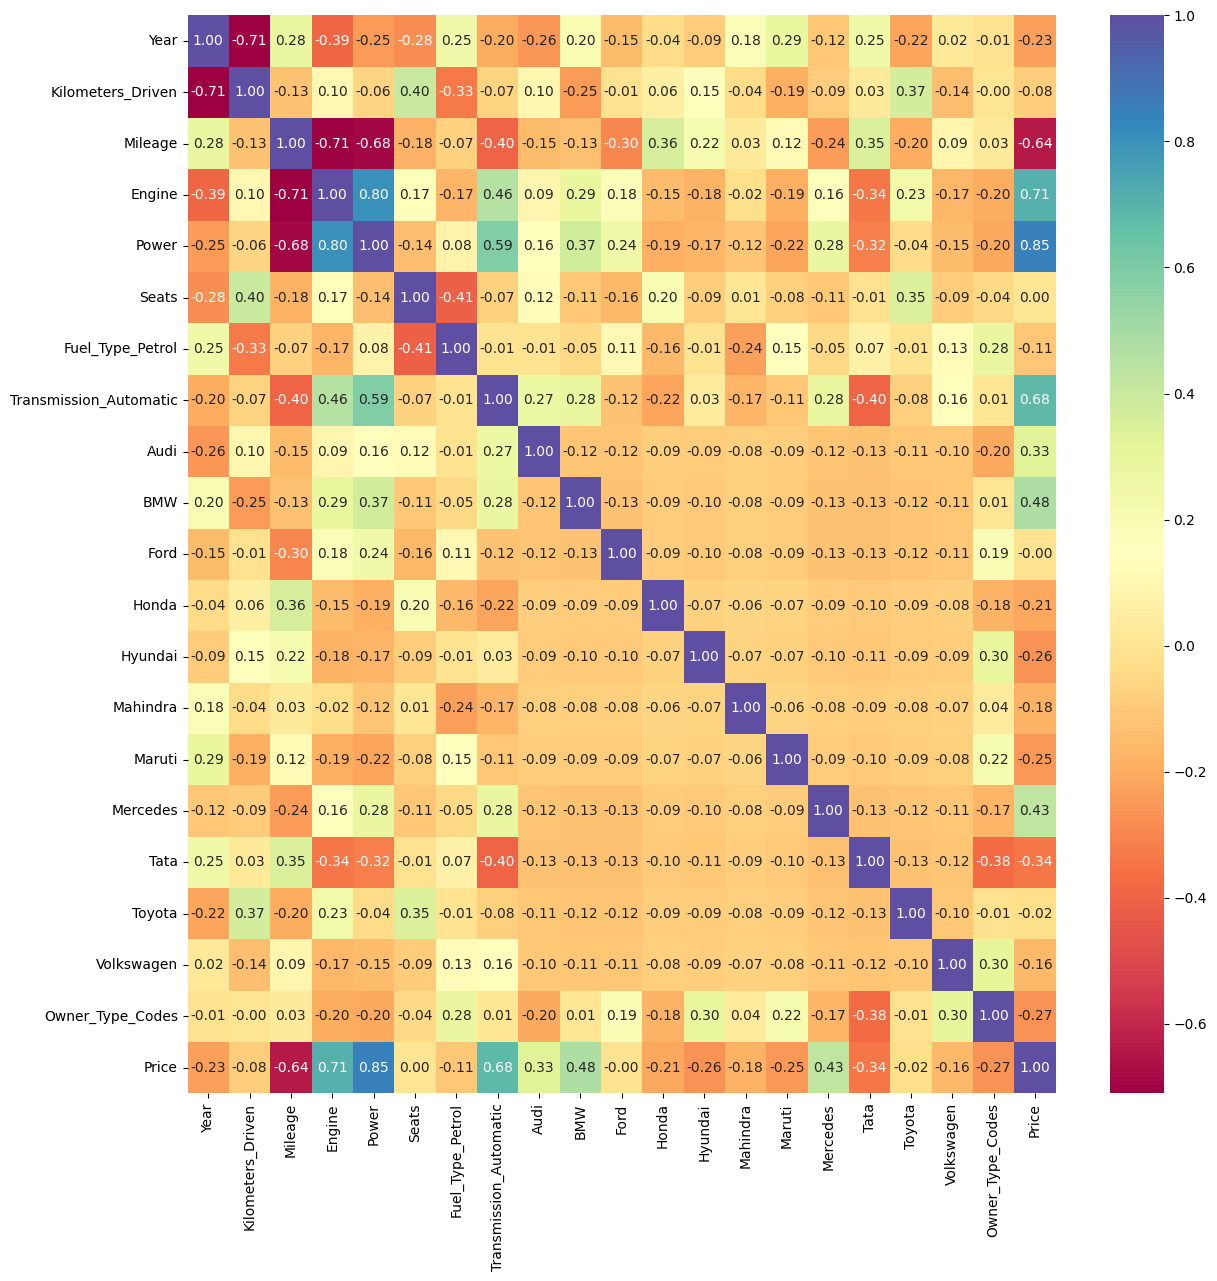

In [25]:
plt.figure(figsize = (14,14))
sns.heatmap(data = corr_matrix, annot = True, cmap = "Spectral", cbar = True, fmt='.2f')
plt.show()

In [26]:
# Вибір колонок,які корелюють з цільовою змінною на більш ніж 0.5 за модулем
price_corr = df_train.corr().iloc[-1, :-1]
price_corr[price_corr.abs() > 0.5].sort_values()

,Price
Mileage,-0.638404
Transmission_Automatic,0.680731
Engine,0.710561
Power,0.849137


**Висновок:**

Найбільша позитивна кореляція з колонками Power, Engine, Transmission_code.

Найбільша негативна кореляція з колонкою Mileage.

**Завдання 6**. Тренуємо лінійну регресію.
0. Видаліть усі НЕчислові колонки з `X_train`, `X_test`, якщо ще цього не зробили.
1. Натренуйте лінійну регресую з `sklearn` на усіх числових даних тренувального набору `X_train`.
2. Зробіть передбачення на  `X_train`, `X_test`. Знайдіть і виведіть root mean squared error відхилення передбачення від справжніх значень цільової змінної.
3. Побудуйте графік розсіювання передбачень проти реальних даних цільової змінної для тренувального і тестувального наборів даних. Що можете сказати про якість моделі?

In [27]:
X_train = X_train.select_dtypes(['int', 'float'])
X_test = X_test.select_dtypes(['int', 'float'])

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  root_mean_squared_error, r2_score

def Lr_train_model(X_train, y_train, X_test, y_test, flag = 0): # if flag == 1 виводиться графік розсіювання предбачень
  lr = LinearRegression().fit(X_train, y_train)
  predictions_train = lr.predict(X_train)
  predictions_test = lr.predict(X_test)
  print(f'rmse_train = {root_mean_squared_error(predictions_train, y_train)}')
  print(f'rmse_test = {root_mean_squared_error(predictions_test, y_test)} \n')
  print(f'r2_train = {r2_score(predictions_train, y_train)}')
  print(f'r2_test = {r2_score(predictions_test, y_test)} \n')

  if flag:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_train, y= lr.predict(X_train), alpha=0.5, label='Тренувальний набір', color='blue')
    sns.scatterplot(x=y_test, y= lr.predict(X_test), alpha=0.7, label='Тестовий набір', color='orange')
    plt.plot([min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())],
              [min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())],
            'g--', lw=2, label='Ідеальні передбачення (y=x)')

    plt.title('Графік розсіювання: Передбачення та Реальні дані')
    plt.xlabel('Реальні значення цільової змінної')
    plt.ylabel('Передбачення моделі')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.tight_layout()
    plt.show()

  return lr

rmse_train = 210342.8016204638
rmse_test = 259601.2654272335 

r2_train = 0.9568210613864648
r2_test = 0.8930113873080232 



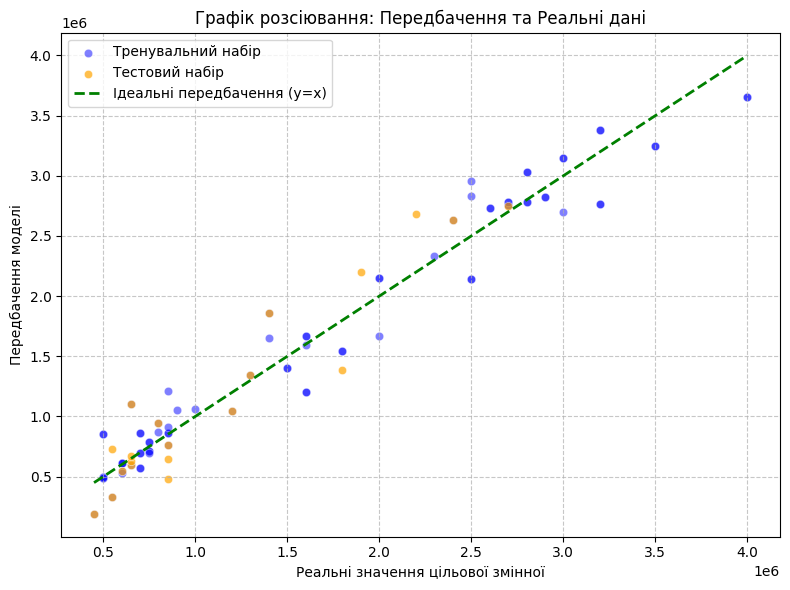

In [29]:
model = Lr_train_model(X_train, y_train, X_test, y_test, flag = 1)

**Висновки:**

Відхилення значень передбачень на тестовій вибірці на чверть більше від тренувальної вибірки майже 260 тисяч проти 210 тисяч. Враховуючи, що значення цільової змінної від 500 тисяч до 4 мільйонів, досить непогане передбачення.

На графіку розсіювання значення предбачень тренувального і тестового наборів знаходяться досить близько до прямої ідеальних значень.

**Завдання 7**. Ми хочемо проаналізувати як впливає кожен чинник на цілову змінну. Для цього давайте промасштабуємо наші дані.
1. Зробіть масштабування незалежних змінних використовуючи `StandardScaler`. Тренуємо на тренувальних даних, а на тестувальних лише викликаємо `transform`.

2. Натренуйте модель на відмасштабованих даних і перегляньте коефіцієнти моделі. Які колонки є найвпливовішими на формування передбачення з точки зору коефіцієнтів? Проаналізуйте напрям дії найважливіших коефіцієнтів. Чи це логічно з точки зору значення відповідних змінних, що вони впливають на цільову змінну саме в напрямі збільшення / зменшення?

In [30]:
from sklearn.preprocessing import StandardScaler

column_names = X_train.columns

scaler = StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=column_names, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=column_names, index=X_test.index)

model_scaled = Lr_train_model(X_train_scaled, y_train, X_test_scaled, y_test)

rmse_train = 210342.80162046402
rmse_test = 259601.2654272351 

r2_train = 0.9568210613864648
r2_test = 0.8930113873080225 



In [31]:
column_names = list(X_train_scaled.columns)
weights_df = pd.DataFrame({
    'feature': np.append(column_names, 1),
    'weight': np.append(model_scaled.coef_, model_scaled.intercept_)
})
weights_df.sort_values('weight', ascending=False)

,feature,weight
20,1,1.680000e+06
4,Power,5.000005e+05
15,Mercedes,2.092577e+05
9,BMW,2.081051e+05
8,Audi,2.061231e+05
7,Transmission_Automatic,1.151534e+05
19,Owner_Type_Codes,4.333507e+04
17,Toyota,1.761943e+04
5,Seats,-1.744049e+03
0,Year,-1.160426e+04


**Висновки:**
Найвпливовішими на формування прогнозу цільової змінної є константа (початкове значення) Power, Mercedes, BMW, Audі, Transmission_Automatic значення цих ознак будуть найбільше впливати на збільшення вартості автомобіля. Від'ємні коефіцінти мають ознаки: Fuel_Type_Petrol, Hyundai, Mahindra, Mileage, Ford, Maruti - значення цих ознак найбільше впливають на зниження ціни.

Збільшення потужності автомобіля, автоматична трансмісія, а також бренди: Mercedes, BMW, Audі підвищують вартість; бензинове паливо - знижує вартість автомобіля (дизель дешевший - вигідніше). Виглядає логічно.

**Завдання 8.** На тих самих відмасштабованих даних натренуйте модель з `statsmodels`. Виведіть звіт і проаналізуйте p-value коефіцієнтів. Які ознаки є стат значущими на рівні значущості 0.05? Напишіть їх список.

In [32]:
import statsmodels.api as sm
def df_statsmodels(X, y):
  X = sm.add_constant(X)
  model = sm.OLS(y,X)
  results = model.fit()
  return results

In [33]:
results_model = df_statsmodels(X_train_scaled, y_train)
print('Звіт:')
print(results_model.summary())

Звіт:
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     73.14
Date:                Wed, 11 Jun 2025   Prob (F-statistic):           2.34e-34
Time:                        12:15:56   Log-Likelihood:                -1094.0
No. Observations:                  80   AIC:                             2228.
Df Residuals:                      60   BIC:                             2276.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                 

In [34]:
pvalues_005 = results_model.pvalues[results_model.pvalues < 0.05].index
pvalues_005_list = list(pvalues_005)
print(f'Ознаки, які є стат значущими на рівні значущості 0.05:\n{pvalues_005_list}  \nкількість: {len(pvalues_005_list)}')

Ознаки, які є стат значущими на рівні значущості 0.05:
['const', 'Mileage', 'Power', 'Fuel_Type_Petrol', 'Transmission_Automatic', 'Audi', 'BMW', 'Ford', 'Hyundai', 'Mahindra', 'Maruti', 'Mercedes', 'Volkswagen']  
кількість: 13


**Завдання 9**. Натренуйте лінійну регресію з `statsmodels` тільки на ознаках, які виявлись стат. значущими в попередньому завданні. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared?

In [35]:
print(f'Для моделі з усіма ознаками метрики statsmodels: \nR2 = {round(results_model.rsquared, 4)}, Adj. R-squared = {round(results_model.rsquared_adj, 4)}\n')

results_005 = df_statsmodels(X_train_scaled[pvalues_005[1:]], y_train)
print(f'Для моделі з ознаками P-value <= 0.05 метрики statsmodels: \nR2 = {round(results_005.rsquared, 4)}, Adj. R-squared = {round(results_005.rsquared_adj, 4)}\n')

print('Модель лінійної регресії LinearRegression з ознаками P-value <= 0.05:\n')
model_005 = Lr_train_model(X_train_scaled[pvalues_005[1:]], y_train, X_test_scaled[pvalues_005[1:]], y_test)

Для моделі з усіма ознаками метрики statsmodels: 
R2 = 0.9586, Adj. R-squared = 0.9455

Для моделі з ознаками P-value <= 0.05 метрики statsmodels: 
R2 = 0.9514, Adj. R-squared = 0.9427

Модель лінійної регресії LinearRegression з ознаками P-value <= 0.05:

rmse_train = 227824.30180439967
rmse_test = 233241.86184464066 

r2_train = 0.9489641354751219
r2_test = 0.912437697456511 



**Завдання 10**. Натренуйте лінійну регресію з `statsmodels` на усіх ознаках з масштабованого `X_train`, у яких p_value в завданні 7 менше за `0.25`. Ми таким чином помʼякшили критерій відбору ознак. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared порівняно з завданням 7? Яку модель з останніх 3х завдань ви б лишили для використання?

In [36]:
pvalues_025 = results_model.pvalues[results_model.pvalues < 0.25].index
pvalues_025_list = list(pvalues_025)
print(f'Ознаки, які є стат значущими на рівні значущості 0.25:\n{pvalues_025_list} \nкількість: {len(pvalues_025_list)}')

Ознаки, які є стат значущими на рівні значущості 0.25:
['const', 'Kilometers_Driven', 'Mileage', 'Power', 'Fuel_Type_Petrol', 'Transmission_Automatic', 'Audi', 'BMW', 'Ford', 'Honda', 'Hyundai', 'Mahindra', 'Maruti', 'Mercedes', 'Tata', 'Volkswagen'] 
кількість: 16


In [37]:
results_025 = df_statsmodels(X_train_scaled[pvalues_025[1:]], y_train)
print(f'Для моделі з ознаками P-value <= 0.25 метрики statsmodels: \nR2 = {round(results_025.rsquared, 4)}, Adj. R-squared = {round(results_025.rsquared_adj, 4)}\n')

print('Для моделі лінійної регресії LinearRegression:')
model_025 = Lr_train_model(X_train_scaled[pvalues_025[1:]], y_train, X_test_scaled[pvalues_025[1:]], y_test)



Для моделі з ознаками P-value <= 0.25 метрики statsmodels: 
R2 = 0.9579, Adj. R-squared = 0.948

Для моделі лінійної регресії LinearRegression:
rmse_train = 212184.26418949338
rmse_test = 250977.95444491826 

r2_train = 0.9560283359483156
r2_test = 0.8990500118423511 



In [38]:
report_R2 = {'P-value <=': ['-', 0.05, 0.25], 'R2': [round(results_model.rsquared, 4), round(results_005.rsquared, 4), round(results_025.rsquared, 4)],\
             'Adj. R-squared': [round(results_model.rsquared_adj, 4), round(results_005.rsquared_adj, 4), round(results_025.rsquared_adj, 4)],
             'RMSE_train':[210342, 227824, 212184], 'RMSE_test': [259601, 233241, 250977], 'R2_train': [0.9568, 0.9489, 0.9560], 'R2_test': [0.8930, 0.9124, 0.8990]}

df_report_R2 = pd.DataFrame(report_R2, index = [1, 2, 3])
df_report_R2

,P-value <=,R2,Adj. R-squared,RMSE_train,RMSE_test,R2_train,R2_test
1,-,0.9586,0.9455,210342,259601,0.9568,0.8930
2,0.05,0.9514,0.9427,227824,233241,0.9489,0.9124
3,0.25,0.9579,0.9480,212184,250977,0.9560,0.8990


**Висновки:**

В цілому всі три моделі мають дуже близькі показники. Я б обрала другу: RMSE для навчальної і тестової вибірки найкращі ідосить близькі між собою, R2 найвищий на тестовій вибірці. На даний момент для цієї моделі потрібно найменша кількість ознак, що майже відповідає кількості спостережень у даних.

В подальшому, якщо значно збільшиться кількість і розподіл даних, відповідно  зміняться значення оцінок, тоді варто було б переглянути таке рішення.

***А далі дослідження даних, в які входить закодована колонка Model.***

In [39]:
# Варінт 1 - кодування всіх даних вручну, створенням словника з двійковими кодами.
X_train_bin1 = X_train_bin1.select_dtypes(['int', 'float'])
X_test_bin1 = X_test_bin1.select_dtypes(['int', 'float'])

print('Додана закодавана колонка Model - 1 варіант \n')
Lr_train_model(X_train_bin1, y_train, X_test_bin1, y_test)


scaler_bin1 = StandardScaler().fit(X_train_bin1)
column_names_bin1 = X_train_bin1.columns
X_train_bin1_scaled = pd.DataFrame(scaler_bin1.transform(X_train_bin1), columns=column_names_bin1, index=X_train_bin1.index)
X_test_bin1_scaled = pd.DataFrame(scaler_bin1.transform(X_test_bin1), columns=column_names_bin1, index=X_test_bin1.index)

print('Стандартизовані дані\n')
Lr_train_model(X_train_bin1_scaled, y_train, X_test_bin1_scaled, y_test)

# Варінт 2 - кодування окремо навчальних і тестових даних з допомогою BinaryEncoder.
X_train_bin2 = X_train_bin2.select_dtypes(['int', 'float'])
X_test_bin2 = X_test_bin2.select_dtypes(['int', 'float'])

print('Додана закодавана колонка Model - 2 варіант \n')
model_bin1 = Lr_train_model(X_train_bin2, y_train, X_test_bin2, y_test)

scaler_bin2 = StandardScaler().fit(X_train_bin2)
column_names_bin2 = X_train_bin2.columns
X_train_bin2_scaled = pd.DataFrame(scaler_bin2.transform(X_train_bin2), columns=column_names_bin2, index=X_train_bin2.index)
X_test_bin2_scaled = pd.DataFrame(scaler_bin2.transform(X_test_bin2), columns=column_names_bin2, index=X_test_bin2.index)

print('Стандартизовані дані\n')
model_bin2 = Lr_train_model(X_train_bin2_scaled, y_train, X_test_bin2_scaled, y_test)


Додана закодавана колонка Model - 1 варіант 

rmse_train = 209567.75578770583
rmse_test = 256802.21174231052 

r2_train = 0.9571522853330272
r2_test = 0.8949080807662031 

Стандартизовані дані

rmse_train = 209567.75578770618
rmse_test = 256802.211742307 

r2_train = 0.9571522853330268
r2_test = 0.8949080807662053 

Додана закодавана колонка Model - 2 варіант 

rmse_train = 204437.47182156757
rmse_test = 271043.51719022816 

r2_train = 0.9593087773707346
r2_test = 0.8809623939239086 

Стандартизовані дані

rmse_train = 204437.47182156693
rmse_test = 271043.5171902264 

r2_train = 0.9593087773707343
r2_test = 0.8809623939239088 



In [40]:
print('Не стандартизовані дані')
results_model_bin1 = df_statsmodels(X_train_bin1, y_train)
print(f'Для моделі 1: R = {round(results_model_bin1.rsquared, 6)}, Adj. R-squared = {round(results_model_bin1.rsquared_adj, 6)}')

results_model_bin2 = df_statsmodels(X_train_bin2, y_train)
print(f'Для моделі 2: R = {round(results_model_bin2.rsquared, 6)}, Adj. R-squared = {round(results_model_bin2.rsquared_adj, 6)}\n')

results_model_bin1_del_Model = df_statsmodels(X_train_bin1.drop(['Model_bin_0',	'Model_bin_1','Model_bin_2'], axis = 1), y_train)
print(f'Для моделі 1 і 2, без Model: R = {round(results_model_bin1_del_Model.rsquared, 6)}, Adj. R-squared = {round(results_model_bin1_del_Model.rsquared_adj, 6)}')

Не стандартизовані дані
Для моделі 1: R = 0.958913, Adj. R-squared = 0.943055
Для моделі 2: R = 0.9609, Adj. R-squared = 0.945809

Для моделі 1 і 2, без Model: R = 0.958608, Adj. R-squared = 0.945501


**Висновки:**

 - Варінт 1 - кодування вручну, результати нейтральні, але маємо небагато даних і моделі фактично немає чого "піддивитися".
 - BinaryEncoder закодовує дані краще ніж я, значення RMSE для навчальної вибірки найнижче з усіх експериментів.
 - Очікувано для тестового набору RMSE найвищий, тому що не зовсім те, яке хотілося б кодування даних - забагато однакових нульових значень (варіант2)
 - Порівняння результатів: через те, що значення представлені трьома стовбчиками одразу, спосіб, яким  я можу це зробити  - порівняти метрики коли вони є, і коли їх немає. З останнього виведеного результату видно, що зміни зовсім незначні.


 В цілому експеримент вийшов цікавий, для більшої вибірки за нагоди треба буде спробувати і Бренд так закодувати.